<a href="https://colab.research.google.com/github/GGYBlank/MLHWCore/blob/main/MLHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
file_path = '/content/drive/My Drive/IntroML/content/D3.csv'
data = pd.DataFrame(pd.read_csv(file_path))
data.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [39]:
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/IntroML/content/D3.csv')


In [40]:
import numpy as np
import matplotlib.pyplot as plt

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions-y))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for _ in range(num_iters):
        prediction = np.dot(X, theta)
        error = prediction - y
        gradient = np.dot(X.T, error)
        theta -= (alpha/m) * gradient
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history


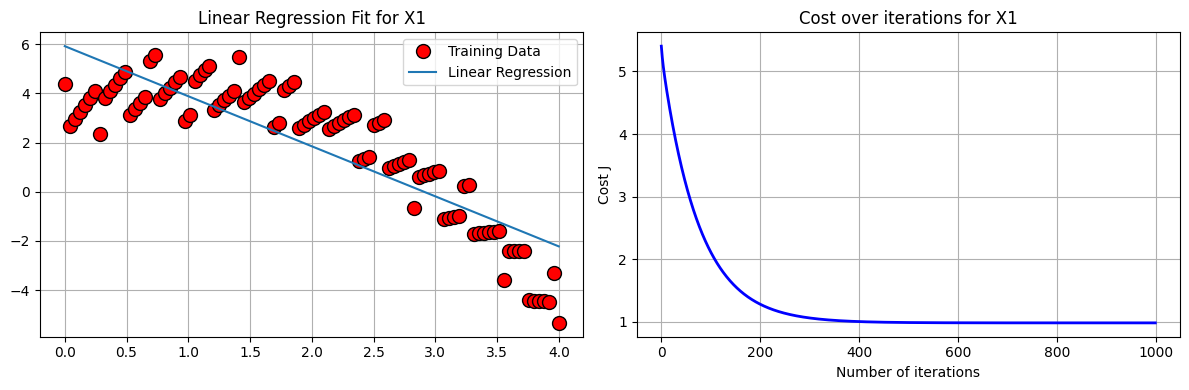

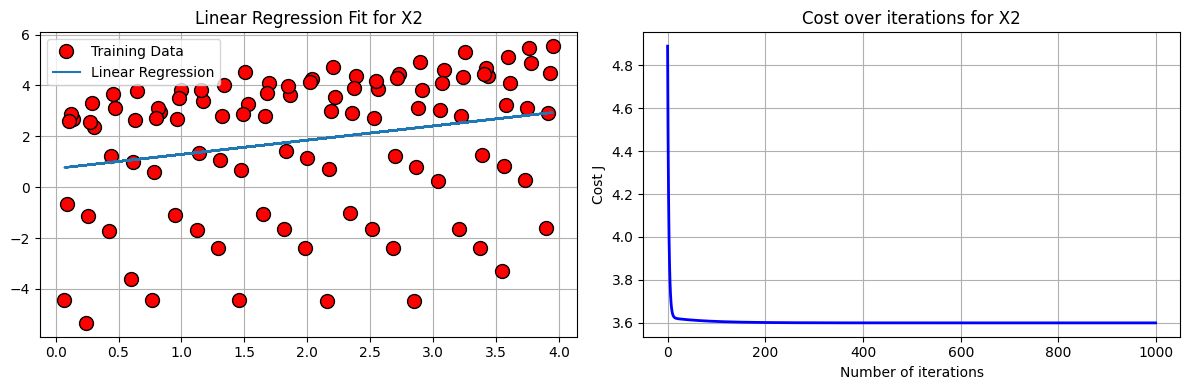

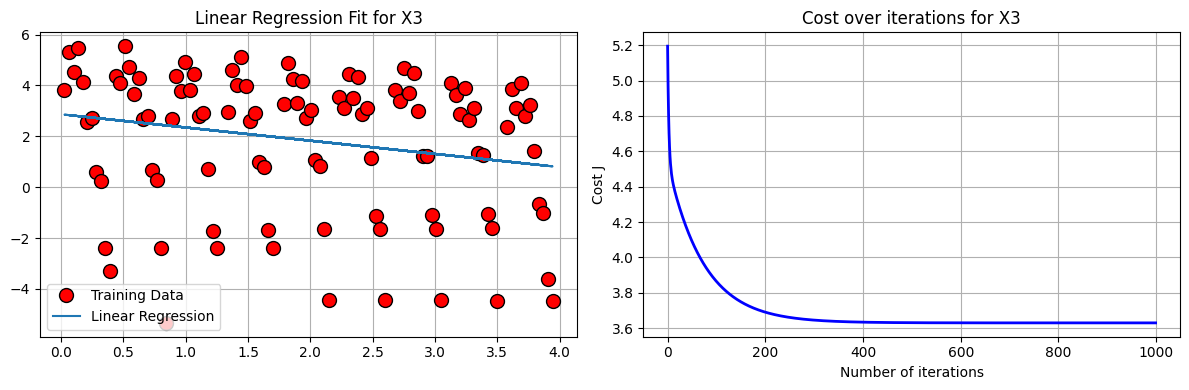

{'X1': array([ 5.92054437, -2.03545475]), 'X2': array([0.73548849, 0.55783022]), 'X3': array([ 2.86836127, -0.51927234])}


In [41]:
alpha = 0.03
num_iters = 1000

y = data.iloc[:,3].values
models = {}
loss_histories = {}

for idx, column in enumerate(data.columns[:-1]):
    X = data.iloc[:, idx].values
    X = np.column_stack((np.ones(len(X)), X)) # add a bias term
    theta = np.zeros(2)

    theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)
    models[column] = theta
    loss_histories[column] = J_history

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.grid(True)
    plt.plot(X[:,1], y, 'ro', ms=10, mec='k', label='Training Data')
    plt.plot(X[:,1], np.dot(X, theta), '-', label='Linear Regression')
    plt.legend()
    plt.title(f'Linear Regression Fit for {column}')

    plt.subplot(1, 2, 2)
    plt.plot(range(num_iters), J_history, '-b', linewidth=2)
    plt.grid(True)
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost J')
    plt.title(f'Cost over iterations for {column}')
    plt.tight_layout()
    plt.show()

print(models) #these are the results for linear model that is found.


[ 5.05440685 -1.96702382  0.57548712 -0.22752628]


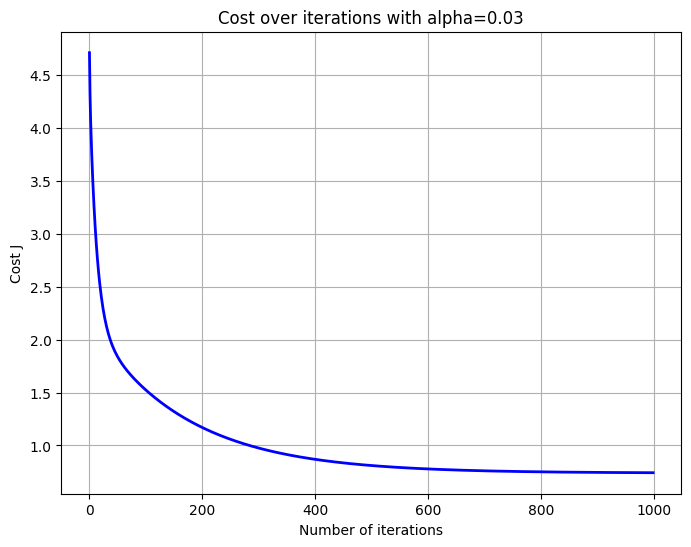

In [42]:
X = data.iloc[:, 0:3].values
X = np.column_stack((np.ones(len(X)), X))  # add a bias term
y = data.iloc[:, 3].values
theta = np.zeros(4)
alpha = 0.03  # Chosen value between 0.1 and 0.01, you can change this to experiment
num_iters = 1000

theta_final, J_history = gradient_descent(X, y, theta, alpha, num_iters)

print(theta_final)

plt.figure(figsize=(8, 6))
plt.plot(range(num_iters), J_history, '-b', linewidth=2)
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.title(f'Cost over iterations with alpha={alpha}')
plt.show()


In [43]:
def predict(X, theta):
    return np.dot(X, theta)

# Values
data_points = np.array([
    [1, 1, 1],
    [2, 0, 4],
    [3, 2, 1]
])

# Add bias term
data_points = np.column_stack((np.ones(len(data_points)), data_points))

predictions = predict(data_points, theta_final)
print(predictions)


[3.43534387 0.21025408 0.07678334]
